In [2]:
import sys
import pandas as pd
import numpy as np
import sqlite3 as db

In [5]:
AIS_raw = pd.read_csv('AIS Data/nari_dynamic.csv', header=0)

In [8]:
#conn = db.connect('AIS_raw_sql.db')
#AIS_raw.to_sql('AIS_raw', conn, if_exists='replace', index=False)


In [15]:
AIS_raw.head(10)

,sourcemmsi,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t
0,245257000,0.0,0.0,0.1,13.1,36,-4.465718,48.382490,1443650402
1,227705102,15.0,-127.0,0.0,262.7,511,-4.496571,48.382420,1443650403
2,228131600,15.0,-127.0,8.5,263.7,511,-4.644325,48.092247,1443650404
3,228051000,0.0,-127.0,0.0,295.0,511,-4.485108,48.381320,1443650405
4,227574020,15.0,-127.0,0.1,248.6,511,-4.495441,48.383660,1443650406
5,228854000,15.0,0.0,10.4,258.2,259,-4.347825,48.117958,1443650408
6,227415000,15.0,-127.0,11.4,176.5,511,-4.769152,47.987152,1443650409
7,228037700,15.0,-127.0,9.1,78.5,511,-4.471913,48.166340,1443650411
8,227443000,15.0,-127.0,11.1,171.5,511,-4.782632,48.005634,1443650411
9,245257000,0.0,0.0,0.0,13.1,35,-4.465720,48.382507,1443650413


In [11]:
#pd.read_sql_query('SELECT * FROM AIS_raw LIMIT 5', conn)

,sourcemmsi,navigationalstatus,rateofturn,speedoverground,courseoverground,trueheading,lon,lat,t
0,245257000,0.0,0.0,0.1,13.1,36,-4.465718,48.382490,1443650402
1,227705102,15.0,-127.0,0.0,262.7,511,-4.496571,48.382420,1443650403
2,228131600,15.0,-127.0,8.5,263.7,511,-4.644325,48.092247,1443650404
3,228051000,0.0,-127.0,0.0,295.0,511,-4.485108,48.381320,1443650405
4,227574020,15.0,-127.0,0.1,248.6,511,-4.495441,48.383660,1443650406


In [43]:
#How many ship IDs are there total
print("Number of unique source MMSI in data set is: ", len(AIS_raw["sourcemmsi"].unique()))

Number of unique source MMSI in data set is:  5055


In [44]:
sample = {245257000, 227705102, 228131600, 228051000, 227574020, 228854000, 227415000, 228037700, 227443000}
ships_test = AIS_raw[AIS_raw['sourcemmsi'].apply(lambda x: x in sample)]

In [46]:
DP_per_ship = ships_test.groupby(['sourcemmsi']).count()
DP_per_ship['t']

sourcemmsi
227415000        246
227443000        275
227574020    1065741
227705102    1032332
228037700      60478
228051000     965870
228131600       1150
228854000       4174
245257000       9680
Name: t, dtype: int64

In [ ]:
#Lets see from what time periods these ships are traveling

In [57]:
short_trip = AIS_raw[AIS_raw['sourcemmsi'] == 227415000]
short_trip['t'] = pd.to_datetime(short_trip['t'], unit='s')
long_trip = AIS_raw[AIS_raw['sourcemmsi'] == 227574020]
long_trip['t'] = pd.to_datetime(long_trip['t'], unit='s')

C:\Users\hayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\hayde\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [58]:
print("Min time short trip:",short_trip['t'].min())
print("Max time short trip:",short_trip['t'].max())
print("Min time long trip:",long_trip['t'].min())
print("Max time long trip:",long_trip['t'].max())

Min time short trip: 2015-09-30 22:00:09
Max time short trip: 2016-01-24 21:12:54
Min time long trip: 2015-09-30 22:00:06
Max time long trip: 2016-03-31 21:59:59


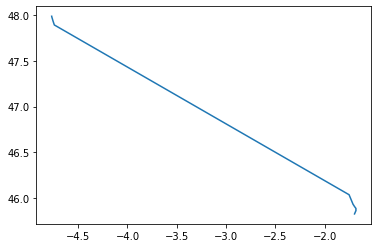

In [61]:
#Lets see where the ships are traveling to and from
import matplotlib.pyplot as plt 
plt.plot(short_trip['lon'], short_trip['lat'])

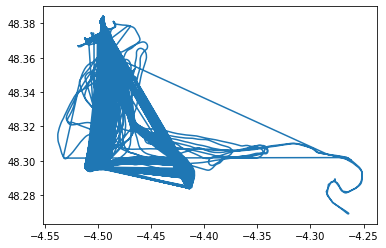

In [62]:
plt.plot(long_trip['lon'], long_trip['lat'])

In [89]:
ship_lon = AIS_raw.groupby('sourcemmsi')['lon'].apply(list).reset_index()
ship_lat = AIS_raw.groupby('sourcemmsi')['lat'].apply(list).reset_index()
ship_time = AIS_raw.groupby('sourcemmsi')['t'].apply(list).reset_index()
ship_1 = pd.merge(ship_lon, ship_lat, on='sourcemmsi')
ship = pd.merge(ship_1, ship_time, on='sourcemmsi')

In [104]:
ship["max_lat"] = ship.apply(lambda x: max(x["lat"]), axis=1)
ship["max_lon"] = ship.apply(lambda x: max(x["lon"]), axis=1)
ship["min_lat"] = ship.apply(lambda x: min(x["lat"]), axis=1)
ship["min_lon"] = ship.apply(lambda x: min(x["lon"]), axis=1)
ship["max_time"] = pd.to_datetime(ship.apply(lambda x: max(x["t"]), axis=1),unit='s')
ship["min_time"] = pd.to_datetime(ship.apply(lambda x: min(x["t"]), axis=1),unit='s')

In [105]:
print("Max coordinates of ships in data")
print("Max Longitude: ", max(ship["max_lon"]))
print("Min Longitude: ", min(ship["min_lon"]))
print("Max Latitude: ", max(ship["max_lat"]))
print("Min Latitude: ", min(ship["min_lat"]))

Max coordinates of ships in data
Max Longitude:  -0.015736667
Min Longitude:  -9.713331
Max Latitude:  50.887634000000006
Min Latitude:  45.001045


In [106]:
print("Max Date: ", max(ship["max_time"]))
print("Min Date: ", min(ship["min_time"]))

Max Date:  2016-03-31 21:59:59
Min Date:  2015-09-30 22:00:01
